# Walmart Category Pricing and Availability Analysis

## Introduction

In this project, in-depth Analysis is applied to Walmart's pricing dynamics and product availability, with a keen focus on price and category-based insights. Employing systematic categorization within distinct price brackets, to unravel patterns governing discount distribution over diverse product.


## Objectives

1. To find if a correlation exist between list price and sales price to learn how walmart maximize profit through pricing strategies.
2. To explore any potential correlations between discount probablity(the tendancy to give a discount) and list price.
3. To see if a trend exist in product availability across categories.

### Data Preprocessing and Cleaning 

- Products with missing values are removed
- Products with negative discount rate(sales price>list price) are removed
- Products with irregular sales price(0 sales price) are discussed separatly
- Data is transformed to ensure consistency in format and structure



## Analysis and Visualizations

### List Price and Sales Price

![ListpriceoverSalesprice](1.png)

### Discount Rate Dispersion and Correlation

![Dispersion](3.png)

![Correlation](5.png)

![Correlationwithout0](4.png)

### Discount Probability over Price Segements

![Disp](discount_prob.png)

### Availability over Categories

![6](6.png)

## Findings and Discussions 

### Correlation Analysis: List Price vs. Sales Price
The initial objective aimed to explore the correlation between list prices and sales prices, seeking insights into Walmart's pricing strategies for maximizing profit. Despite the hypothesis of a potential correlation centered around lower-priced items, the analysis revealed a correlation coefficient close to zero. 

We noticed and questioned that the majority of data points in the graph concentrates at 0%, which may have hugely shifted the correlation line. A refined correlation analysis excluding the 0 values was conducted. The result was consistent even when excluding items with 0 values further indicated a lack of a linear relationship between list and sales prices.
### Discount Rate Dispersion and Correlation Metrics
The dispersion graph provided a comprehensive view of the distribution of discount rates across products. Although the correlation coefficient was low, suggesting a weak linear relationship, closer inspection revealed an interesting pattern. The presence of distinct clusters and the absence of a linear correlation underscore the need for a nuanced approach to understanding Walmart's discounting patterns.

### Redefined Metrics: Discount Probability Segmentation


Recognizing the limitations of traditional correlation metrics, a redefined approach was adopted. Assigning new metrics based on the presence or absence of discounts, we segmented the price ranges to investigate the discount probability within each segment. The analysis unveiled a consistent growth in discount probability across different price ranges, challenging the initial hypothesis and highlighting the need for a more granular understanding of discounting strategies
### Conclusion



In conclusion, while the traditional correlation analysis did not reveal a straightforward relationship between list and sales prices, the nuanced approach of redefining metrics provided deeper insights. The steady increase in discount probability across price segments suggests that Walmart's discounting strategies may be influenced by factors beyond a linear correlation with list prices. Future investigations may involve more sophisticated methodologies to capture the intricacies of pricing dynamics.

These findings underscore the complexity of retail pricing strategies, emphasizing the importance of considering multiple variables in understanding pricing behaviors. Further research could delve into the specific factors influencing discounting decisions and their implications for overall profit optimization.



In [34]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


In [2]:
# Data Cleaning

# 1. Read CSV file.

file_path = "WalmartEC.csv"
df1 = pd.read_csv(file_path)

df1.head()       # Display first few row


,Uniq Id,Crawl Timestamp,Product Url,Product Name,Description,List Price,Sale Price,Brand,Item Number,Gtin,Package Size,Category,Postal Code,Available
0,019b67ef7f01103d8fb0a53e4c36daa7,2019-12-18 10:20:52 +0000,https://www.walmart.com/ip/La-Costena-Chipotle...,"La Costena Chipotle Peppers, 7 OZ (Pack of 12)",We aim to show you accurate product informati...,31.93,31.93,La Costeï¿½ï¿½a,NaN,139941530,NaN,"Food | Meal Solutions, Grains & Pasta | Canned...",NaN,True
1,3a4ff306dcc8a6e2bf720964d29b84c3,2019-12-18 17:21:48 +0000,https://www.walmart.com/ip/Equate-Triamcinolon...,Equate Triamcinolone Acetonide Nasal Allergy S...,We aim to show you accurate product informati...,10.48,10.48,Equate,569045548.0,632775553,NaN,Health | Equate | Equate Allergy | Equate Sinu...,NaN,True
2,80090549d7d176327b186353c7b28ca4,2019-12-18 17:46:41 +0000,https://www.walmart.com/ip/AduroSmart-ERIA-Sof...,AduroSmart ERIA Soft White Smart A19 Light Bul...,We aim to show you accurate product informati...,10.99,10.99,AduroSmart ERIA,568068849.0,281487005,NaN,Electronics | Smart Home | Smart Energy and Li...,NaN,True
3,151ee1c61a29bacfedb01cd500494b2f,2019-12-18 22:14:22 +0000,https://www.walmart.com/ip/24-Classic-Adjustab...,"24"" Classic Adjustable Balloon Fender Set Chro...",We aim to show you accurate product informati...,38.59,38.59,lowrider,NaN,133714060,NaN,Sports & Outdoors | Bikes | Bike Accessories |...,NaN,True
4,7b2ef8d41f65df121f6b4b9828cf8dad,2019-12-18 06:56:02 +0000,https://www.walmart.com/ip/Elephant-Shape-Sili...,Elephant Shape Silicone Drinkware Portable Sil...,We aim to show you accurate product informati...,5.81,5.81,Anself,NaN,104042139,NaN,Baby | Feeding | Sippy Cups: Alternatives to P...,NaN,True


In [3]:
# Display data types and missing values

df1.info()        

# Conclusion: Missing Values in Description(13), Brand(564), Item Number(21125), Package Size(30000), Category(17) in 30000rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Uniq Id          30000 non-null  object 
 1   Crawl Timestamp  30000 non-null  object 
 2   Product Url      30000 non-null  object 
 3   Product Name     30000 non-null  object 
 4   Description      29947 non-null  object 
 5   List Price       30000 non-null  float64
 6   Sale Price       30000 non-null  float64
 7   Brand            29436 non-null  object 
 8   Item Number      8875 non-null   float64
 9   Gtin             30000 non-null  int64  
 10  Package Size     0 non-null      float64
 11  Category         29983 non-null  object 
 12  Postal Code      0 non-null      float64
 13  Available        30000 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(7)
memory usage: 3.0+ MB


In [4]:
#2. Missing Values.

del df1["Item Number"]
del df1["Postal Code"]
del df1["Description"]
del df1["Package Size"]    # Remove Problematic and Redundant Columns

missing_categories = df1[df1['Category'].isnull()]
missing_categories.to_csv('missing_categories.csv', index=False)

df1['Category'].fillna('Uncategorized', inplace=True) # Fill missing values with "Uncategorized"

missing_brands = df1[df1['Brand'].isnull()]
missing_brands.to_csv('missing_brands.csv', index=False)

df1['Brand'].fillna('Unknown', inplace=True) # Fill missing Brands with "Unknown"


print(df1.info())        # Display data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Uniq Id          30000 non-null  object 
 1   Crawl Timestamp  30000 non-null  object 
 2   Product Url      30000 non-null  object 
 3   Product Name     30000 non-null  object 
 4   List Price       30000 non-null  float64
 5   Sale Price       30000 non-null  float64
 6   Brand            30000 non-null  object 
 7   Gtin             30000 non-null  int64  
 8   Category         30000 non-null  object 
 9   Available        30000 non-null  bool   
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 2.1+ MB
None


In [5]:
df1.head()        # Display first few rows

,Uniq Id,Crawl Timestamp,Product Url,Product Name,List Price,Sale Price,Brand,Gtin,Category,Available
0,019b67ef7f01103d8fb0a53e4c36daa7,2019-12-18 10:20:52 +0000,https://www.walmart.com/ip/La-Costena-Chipotle...,"La Costena Chipotle Peppers, 7 OZ (Pack of 12)",31.93,31.93,La Costeï¿½ï¿½a,139941530,"Food | Meal Solutions, Grains & Pasta | Canned...",True
1,3a4ff306dcc8a6e2bf720964d29b84c3,2019-12-18 17:21:48 +0000,https://www.walmart.com/ip/Equate-Triamcinolon...,Equate Triamcinolone Acetonide Nasal Allergy S...,10.48,10.48,Equate,632775553,Health | Equate | Equate Allergy | Equate Sinu...,True
2,80090549d7d176327b186353c7b28ca4,2019-12-18 17:46:41 +0000,https://www.walmart.com/ip/AduroSmart-ERIA-Sof...,AduroSmart ERIA Soft White Smart A19 Light Bul...,10.99,10.99,AduroSmart ERIA,281487005,Electronics | Smart Home | Smart Energy and Li...,True
3,151ee1c61a29bacfedb01cd500494b2f,2019-12-18 22:14:22 +0000,https://www.walmart.com/ip/24-Classic-Adjustab...,"24"" Classic Adjustable Balloon Fender Set Chro...",38.59,38.59,lowrider,133714060,Sports & Outdoors | Bikes | Bike Accessories |...,True
4,7b2ef8d41f65df121f6b4b9828cf8dad,2019-12-18 06:56:02 +0000,https://www.walmart.com/ip/Elephant-Shape-Sili...,Elephant Shape Silicone Drinkware Portable Sil...,5.81,5.81,Anself,104042139,Baby | Feeding | Sippy Cups: Alternatives to P...,True


In [6]:
# 3. Check Duplicates.


duplicates = df1[df1.duplicated()]

# Show duplicated rows
print("Duplicates:")
print(duplicates)

# No Dups found

Duplicates:
Empty DataFrame
Columns: [Uniq Id, Crawl Timestamp, Product Url, Product Name, List Price, Sale Price, Brand, Gtin, Category, Available]
Index: []


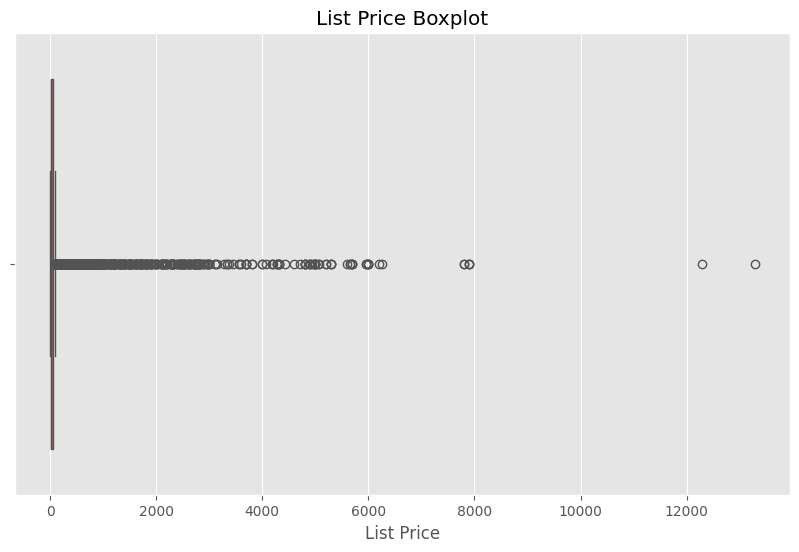

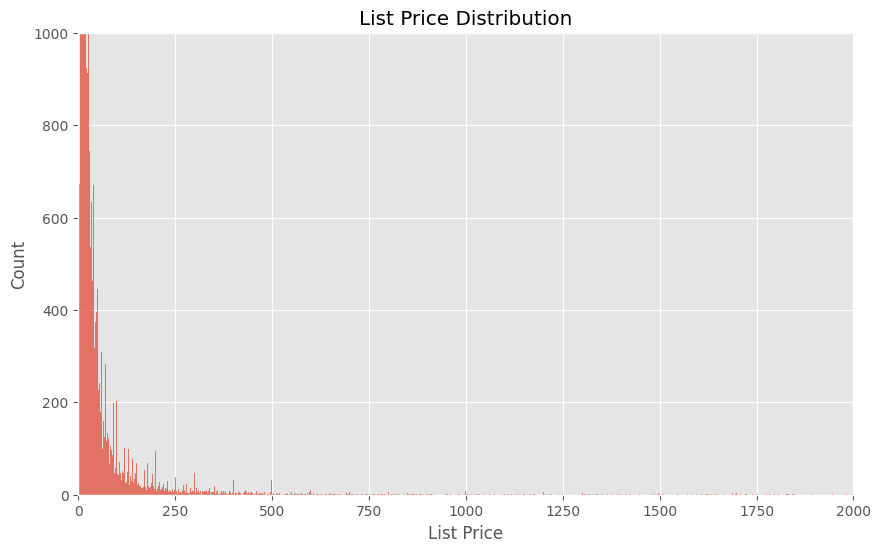

In [7]:
# 4. Check Outliers.

df1.describe([x*0.1 for x in range(10)])

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df1['List Price'])
plt.title('List Price Boxplot')
plt.show()

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df1['List Price'])
plt.xlim(0, 2000)
plt.ylim(0, 1000)
plt.title('List Price Distribution')
plt.show()

# Items with List Price <= 0
zero_list_price_items = df1[df1['List Price'] <= 0]
zero_list_price_items.to_csv('zero_list_price_items.csv', index=False)

# Items with List Price >= 6000
high_list_price_items = df1[df1['List Price'] > 6000]
high_list_price_items.to_csv('high_list_price_items.csv', index=False)

# 397 rows of items have list price of 0, and they are all unavailable. Mannualy checked items with list prices above 6000, a conversation with
#specilists would still be required if the prices are correct.



In [8]:
# Filter out rows where 'Available' is False to check if list price of 0 serves a purpose of place holder for unavailable items.
unavailable_df = df1[df1['Available'] == False]

# Display unvavailable DataFrame
print(unavailable_df)

# Remove items with list price=0
df1 = df1[df1['List Price'] != 0]

# Outliers can't really be defined, removed items with 0 list price for analytical purpose. Items with 0 list price are 
#not necessarily outliers or entry mistakes, but purpose for assigning 0 to list price is .

                                Uniq Id            Crawl Timestamp  \
5      e4fab4b6f41eac02d22b421818c8f080  2019-12-18 11:06:27 +0000   
24     370a181b830e12a28ffed4e0a682f62a  2019-12-18 13:35:37 +0000   
44     7ff5f1285c377369e8cc5ea71459f676  2019-12-18 09:29:58 +0000   
66     728612d29c56965f5d7e675581146ab4  2019-12-18 11:44:48 +0000   
91     6221e8068a72292c67590677c3408e07  2019-12-18 08:47:02 +0000   
...                                 ...                        ...   
29917  3109c38241b3cc0584412051bc5cba40  2019-12-19 05:57:34 +0000   
29929  bdd4af905c5118eca1f1f4285147ef39  2019-12-18 21:39:53 +0000   
29940  6f377fb23da9129d8c5c25014dd8b96b  2019-12-19 04:50:17 +0000   
29976  d948582965ea129c6cbcc7186d243b49  2019-12-18 06:04:47 +0000   
29995  a471d7da9a2cb49dff316be704d2a0ae  2019-12-18 10:09:38 +0000   

                                             Product Url  \
5      https://www.walmart.com/ip/6-Boxes-Twinings-of...   
24     https://www.walmart.com/ip/Wonde

In [9]:
#5. Assure Data Type.

df1['Crawl Timestamp'] = pd.to_datetime(df1['Crawl Timestamp'])

df1['Gtin'] = df1['Gtin'].astype(str)

df1['Available'] = df1['Available'].astype(bool)


In [10]:
# 6. Output Cleaned Data.

df1.head()        # Final Check

,Uniq Id,Crawl Timestamp,Product Url,Product Name,List Price,Sale Price,Brand,Gtin,Category,Available
0,019b67ef7f01103d8fb0a53e4c36daa7,2019-12-18 10:20:52+00:00,https://www.walmart.com/ip/La-Costena-Chipotle...,"La Costena Chipotle Peppers, 7 OZ (Pack of 12)",31.93,31.93,La Costeï¿½ï¿½a,139941530,"Food | Meal Solutions, Grains & Pasta | Canned...",True
1,3a4ff306dcc8a6e2bf720964d29b84c3,2019-12-18 17:21:48+00:00,https://www.walmart.com/ip/Equate-Triamcinolon...,Equate Triamcinolone Acetonide Nasal Allergy S...,10.48,10.48,Equate,632775553,Health | Equate | Equate Allergy | Equate Sinu...,True
2,80090549d7d176327b186353c7b28ca4,2019-12-18 17:46:41+00:00,https://www.walmart.com/ip/AduroSmart-ERIA-Sof...,AduroSmart ERIA Soft White Smart A19 Light Bul...,10.99,10.99,AduroSmart ERIA,281487005,Electronics | Smart Home | Smart Energy and Li...,True
3,151ee1c61a29bacfedb01cd500494b2f,2019-12-18 22:14:22+00:00,https://www.walmart.com/ip/24-Classic-Adjustab...,"24"" Classic Adjustable Balloon Fender Set Chro...",38.59,38.59,lowrider,133714060,Sports & Outdoors | Bikes | Bike Accessories |...,True
4,7b2ef8d41f65df121f6b4b9828cf8dad,2019-12-18 06:56:02+00:00,https://www.walmart.com/ip/Elephant-Shape-Sili...,Elephant Shape Silicone Drinkware Portable Sil...,5.81,5.81,Anself,104042139,Baby | Feeding | Sippy Cups: Alternatives to P...,True


In [11]:
print(df1.info())        # Final Check


<class 'pandas.core.frame.DataFrame'>
Index: 29604 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   Uniq Id          29604 non-null  object             
 1   Crawl Timestamp  29604 non-null  datetime64[ns, UTC]
 2   Product Url      29604 non-null  object             
 3   Product Name     29604 non-null  object             
 4   List Price       29604 non-null  float64            
 5   Sale Price       29604 non-null  float64            
 6   Brand            29604 non-null  object             
 7   Gtin             29604 non-null  object             
 8   Category         29604 non-null  object             
 9   Available        29604 non-null  bool               
dtypes: bool(1), datetime64[ns, UTC](1), float64(2), object(6)
memory usage: 2.3+ MB
None


In [12]:
df1.to_csv('Walmart_cleaned_data.csv', index=False) #Output Data

In [13]:
# Data Exploratory

#1. Read Cleaned Data.

file_path1 = 'Walmart_cleaned_data.csv'
df2 = pd.read_csv(file_path1)

df2.head()       # Display first few row


,Uniq Id,Crawl Timestamp,Product Url,Product Name,List Price,Sale Price,Brand,Gtin,Category,Available
0,019b67ef7f01103d8fb0a53e4c36daa7,2019-12-18 10:20:52+00:00,https://www.walmart.com/ip/La-Costena-Chipotle...,"La Costena Chipotle Peppers, 7 OZ (Pack of 12)",31.93,31.93,La Costeï¿½ï¿½a,139941530,"Food | Meal Solutions, Grains & Pasta | Canned...",True
1,3a4ff306dcc8a6e2bf720964d29b84c3,2019-12-18 17:21:48+00:00,https://www.walmart.com/ip/Equate-Triamcinolon...,Equate Triamcinolone Acetonide Nasal Allergy S...,10.48,10.48,Equate,632775553,Health | Equate | Equate Allergy | Equate Sinu...,True
2,80090549d7d176327b186353c7b28ca4,2019-12-18 17:46:41+00:00,https://www.walmart.com/ip/AduroSmart-ERIA-Sof...,AduroSmart ERIA Soft White Smart A19 Light Bul...,10.99,10.99,AduroSmart ERIA,281487005,Electronics | Smart Home | Smart Energy and Li...,True
3,151ee1c61a29bacfedb01cd500494b2f,2019-12-18 22:14:22+00:00,https://www.walmart.com/ip/24-Classic-Adjustab...,"24"" Classic Adjustable Balloon Fender Set Chro...",38.59,38.59,lowrider,133714060,Sports & Outdoors | Bikes | Bike Accessories |...,True
4,7b2ef8d41f65df121f6b4b9828cf8dad,2019-12-18 06:56:02+00:00,https://www.walmart.com/ip/Elephant-Shape-Sili...,Elephant Shape Silicone Drinkware Portable Sil...,5.81,5.81,Anself,104042139,Baby | Feeding | Sippy Cups: Alternatives to P...,True


In [14]:
df2.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29604 entries, 0 to 29603
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Uniq Id          29604 non-null  object 
 1   Crawl Timestamp  29604 non-null  object 
 2   Product Url      29604 non-null  object 
 3   Product Name     29604 non-null  object 
 4   List Price       29604 non-null  float64
 5   Sale Price       29604 non-null  float64
 6   Brand            29604 non-null  object 
 7   Gtin             29604 non-null  int64  
 8   Category         29604 non-null  object 
 9   Available        29604 non-null  bool   
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 2.1+ MB


In [15]:
df2.describe()    
df2.drop('Gtin', axis=1).describe([x * 0.1 for x in range(10)])

,List Price,Sale Price
count,29604.000000,29604.000000
mean,72.760576,71.885462
std,319.713464,319.388609
min,0.100000,0.100000
0%,0.100000,0.100000
10%,6.980000,6.923000
20%,9.796000,9.520000
30%,12.980000,12.750000
40%,16.552000,16.090000
50%,21.470000,20.990000


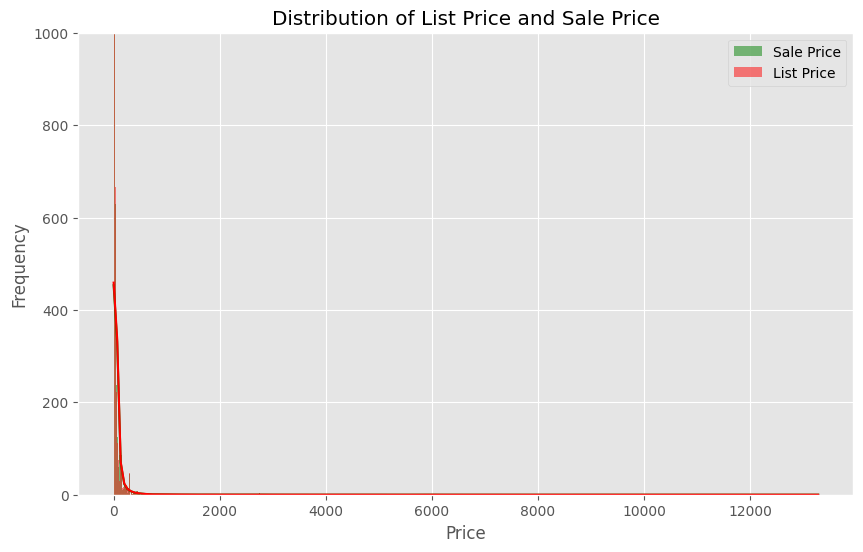

In [16]:
# Price distribution
plt.figure(figsize=(10, 6))

# Sale Price
sns.histplot(df2['Sale Price'], kde=True, color='green', label='Sale Price')

# List Price
sns.histplot(df2['List Price'], kde=True, color='red', label='List Price')

plt.title('Distribution of List Price and Sale Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.ylim(0, 1000)

plt.show()

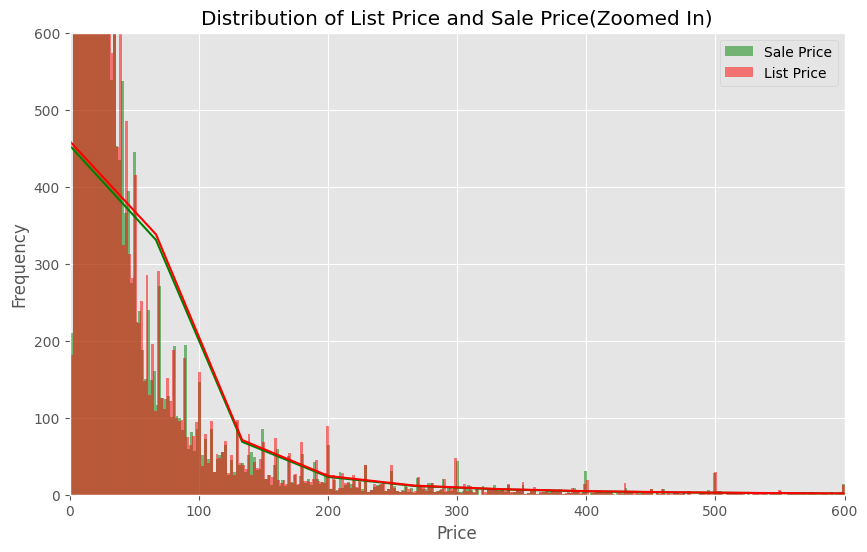

In [39]:
# Price distribution
plt.figure(figsize=(10, 6))

# Sale Price
sns.histplot(df2['Sale Price'], kde=True, color='green', label='Sale Price')

# List Price
sns.histplot(df2['List Price'], kde=True, color='red', label='List Price')

plt.title('Distribution of List Price and Sale Price(Zoomed In)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.ylim(0, 600)
plt.xlim(0, 600)

plt.savefig('1')
plt.show()

In [18]:
df2['Big_Category'] = df2['Category'].str.split('|').str[0].str.strip()
df2['Big_Category'].fillna(" uncategorized ", inplace=True)

# Count products in each Big Category
categories = df2['Big_Category'].value_counts().reset_index()
categories.columns = ['Big_Category', 'Number of Products']


categories.head(34)

,Big_Category,Number of Products
0,Sports & Outdoors,10963
1,Food,3937
2,Health,3907
3,Baby,2709
4,Personal Care,2303
5,Household Essentials,1944
6,Toys,866
7,Beauty,807
8,Home,469
9,Clothing,444


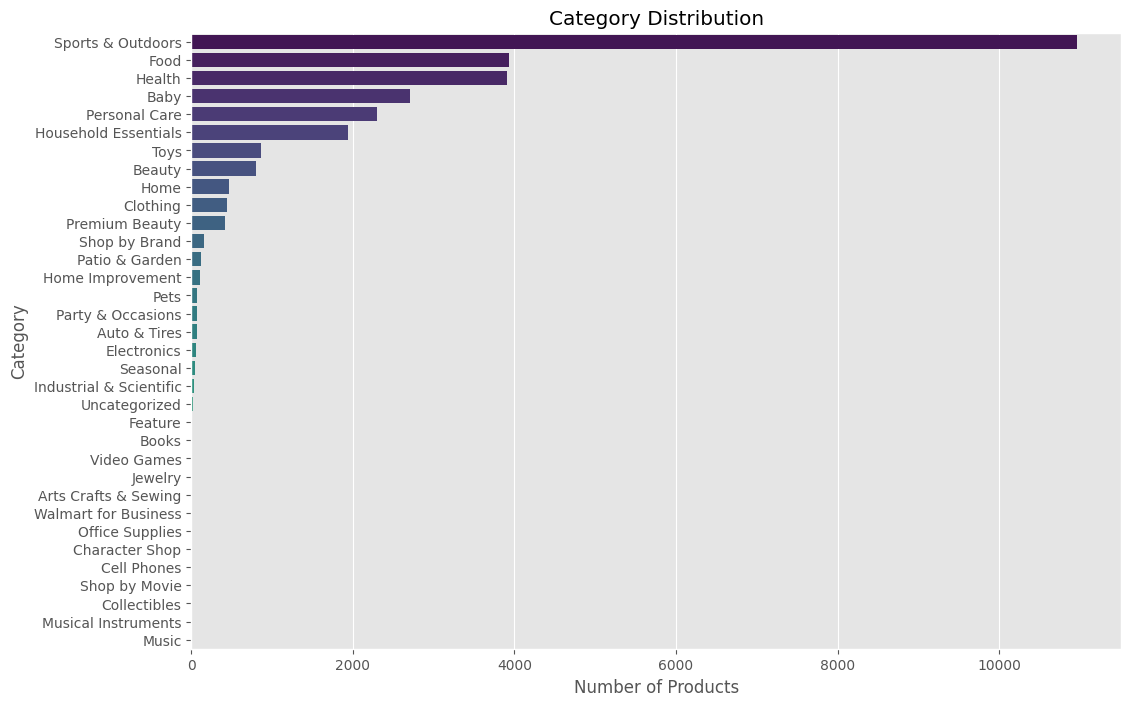

In [19]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Products', y='Big_Category', data=categories, hue='Big_Category', palette='viridis', legend=False)
plt.title('Category Distribution')
plt.xlabel('Number of Products')
plt.ylabel('Category')
plt.show()

In [20]:
# Let's find out the correlation of discount rate and list price, and the discount rate distribution for different catagories.

# Add a discount rate column first.

df2['Discount Rate'] = ((df2['List Price'] - df2['Sale Price']) / df2['List Price']) * 100

print(df2[['List Price', 'Sale Price', 'Discount Rate']])

       List Price  Sale Price  Discount Rate
0           31.93       31.93            0.0
1           10.48       10.48            0.0
2           10.99       10.99            0.0
3           38.59       38.59            0.0
4            5.81        5.81            0.0
...           ...         ...            ...
29599       45.99       45.99            0.0
29600       33.25       33.25            0.0
29601        8.88        8.88            0.0
29602       50.00       24.50           51.0
29603        6.00        4.20           30.0

[29604 rows x 3 columns]


In [21]:
disrate_t = df2.groupby('Big_Category')['Discount Rate'].describe()[['count', 'mean', 'min', '25%', '50%', '75%', 'max']]
disrate_t.columns = ['Count', 'Mean', 'Min', '25%', '50%', '75%', 'Max']

print(disrate_t)# Make a table discount rate by category
disrate_t = df2.groupby('Big_Category')['Discount Rate'].describe()[['count', 'mean', 'min', '25%', '50%', '75%', 'max']]
disrate_t.columns = ['Count', 'Mean', 'Min', '25%', '50%', '75%', 'Max']


print(disrate_t)

                           Count       Mean         Min  25%  50%       75%  \
Big_Category                                                                  
Arts Crafts & Sewing         8.0   8.704068    0.000000  0.0  0.0  1.574803   
Auto & Tires                73.0   1.881087    0.000000  0.0  0.0  0.000000   
Baby                      2709.0   3.194486    0.000000  0.0  0.0  0.000000   
Beauty                     807.0   2.444126    0.000000  0.0  0.0  0.000000   
Books                       14.0   0.000000    0.000000  0.0  0.0  0.000000   
Cell Phones                  4.0   0.000000    0.000000  0.0  0.0  0.000000   
Character Shop               5.0   5.720081    0.000000  0.0  0.0  0.000000   
Clothing                   444.0   1.239054    0.000000  0.0  0.0  0.000000   
Collectibles                 3.0   3.889537    0.000000  0.0  0.0  5.834306   
Electronics                 56.0   0.000000    0.000000  0.0  0.0  0.000000   
Feature                     15.0   2.118451    0.000

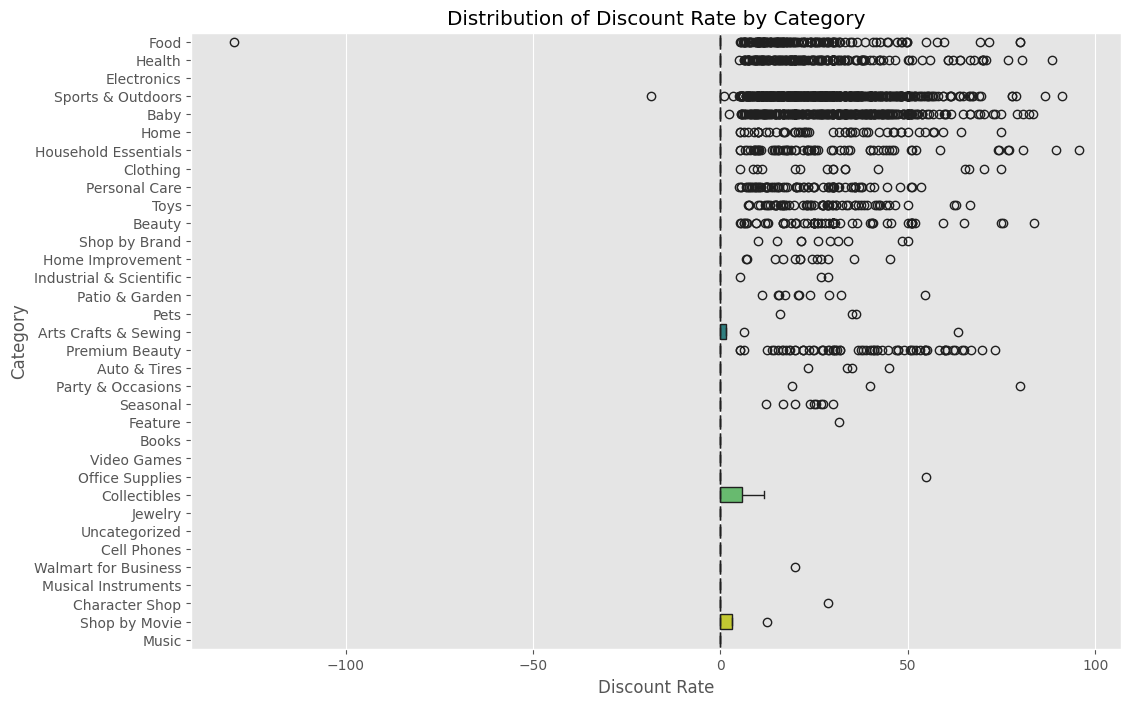

In [22]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Discount Rate', y='Big_Category', hue='Big_Category', data=df2, palette='viridis', dodge=False, legend=False)
plt.title('Distribution of Discount Rate by Category')
plt.xlabel('Discount Rate')
plt.ylabel('Category')
plt.show()


In [23]:
# Noticed negative discounte rate items in the table

negative_discount = df2[df2['Discount Rate'] < 0]
negative_discount.head()


# It maybe data entry error, or perhaps due to some reason the products actually roses over time. According to Amazon online store,
# currently, the price of Goya Stuffed Olives Minced Anchovies has a price that is even higher.

,Uniq Id,Crawl Timestamp,Product Url,Product Name,List Price,Sale Price,Brand,Gtin,Category,Available,Big_Category,Discount Rate
13122,88a9ec271486b0ad61698e86250e47dc,2019-12-18 13:29:52+00:00,https://www.walmart.com/ip/Goya-Stuffed-Olives...,"Goya Stuffed Olives Minced Anchovies, 5.25 OZ",3.01,6.92,Goya Foods,35277851,"Food | Condiments, Sauces & Spices | Olives",True,Food,-129.900332
23033,2c3c9828cbbe01aeecc960ec19a6841e,2019-12-19 01:13:23+00:00,https://www.walmart.com/ip/Yes4All-Barbell-Hol...,Yes4All Barbell Holder 5 Bars Vertical Storage...,49.99,59.27,Yes4All,881446679,Sports & Outdoors | Exercise & Fitness | Stren...,True,Sports & Outdoors,-18.563713


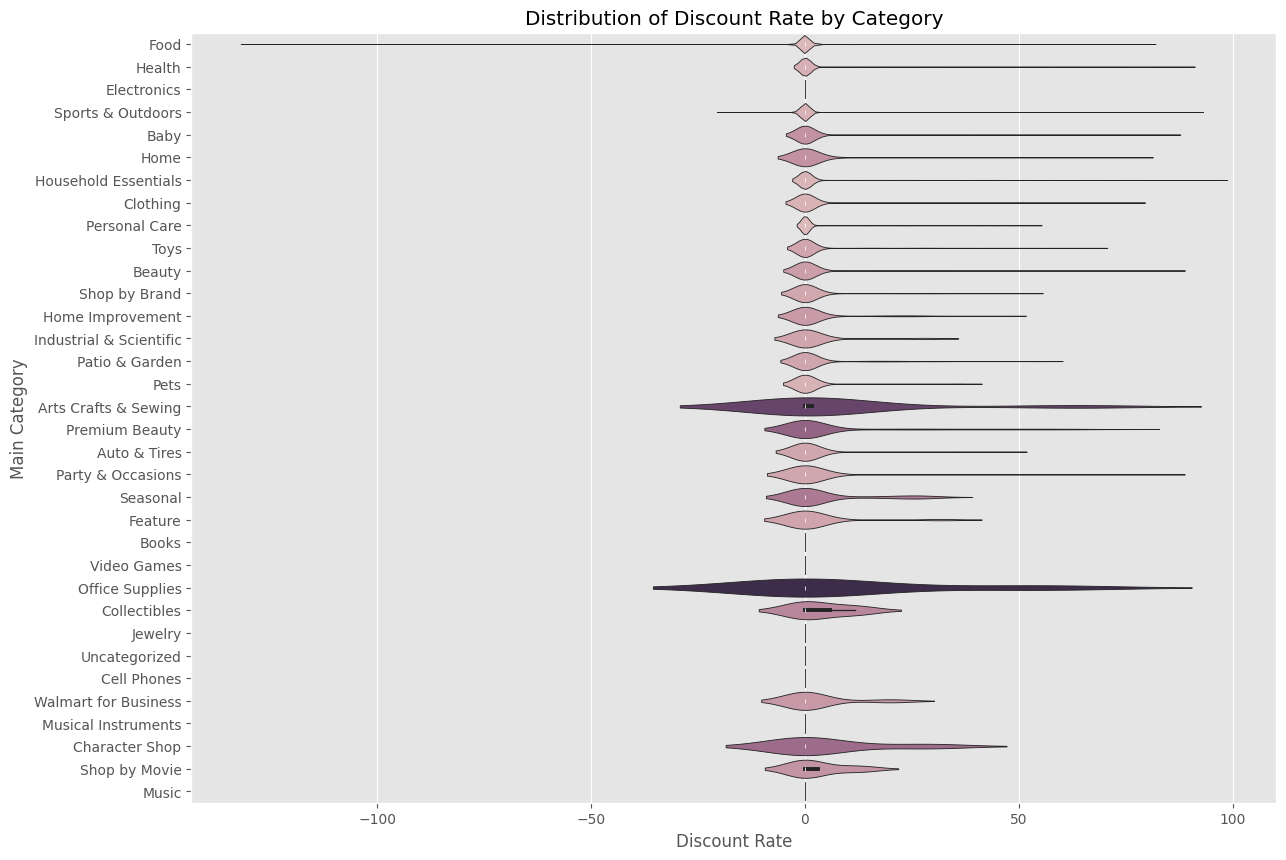

In [24]:
df2['DC'] = df2.groupby('Big_Category')['Discount Rate'].transform('mean')

colormap = sns.cubehelix_palette(dark=0.2, light=0.8, as_cmap=True)

# A violin plot could be better at showing the distribution
plt.figure(figsize=(14, 10))
sns.violinplot(x='Discount Rate', y='Big_Category', data=df2, color='red', hue='DC', palette=colormap, legend=False)

# Set plot labels and title
plt.xlabel('Discount Rate')
plt.ylabel('Main Category')
plt.title('Distribution of Discount Rate by Category')

# Show the plot
plt.show()


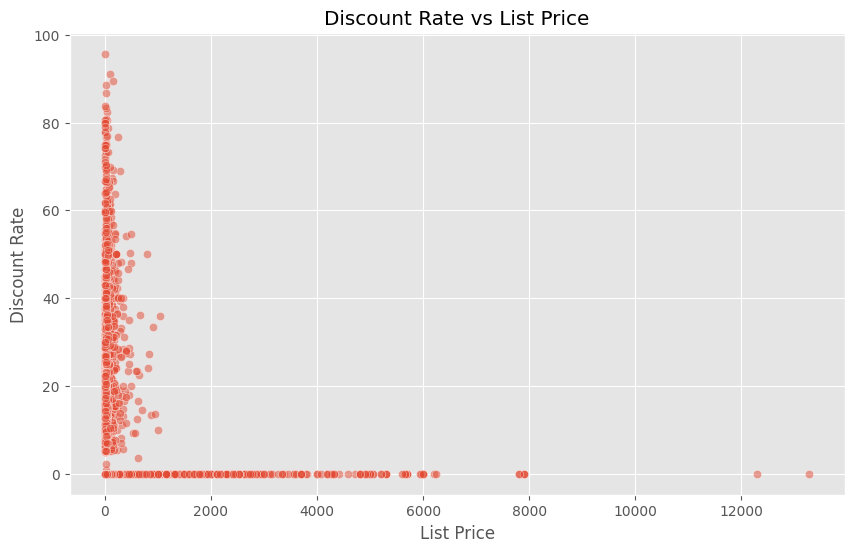

In [46]:
# Now I want to know if there is a correlation between Discount Rate and List Price.

df3 = df2[(df2['Discount Rate'] >= 0) ]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='List Price', y='Discount Rate', data=df3, alpha=0.5)

plt.xlabel('List Price')
plt.ylabel('Discount Rate')
plt.title('Discount Rate vs List Price')

plt.savefig('3')
plt.show()

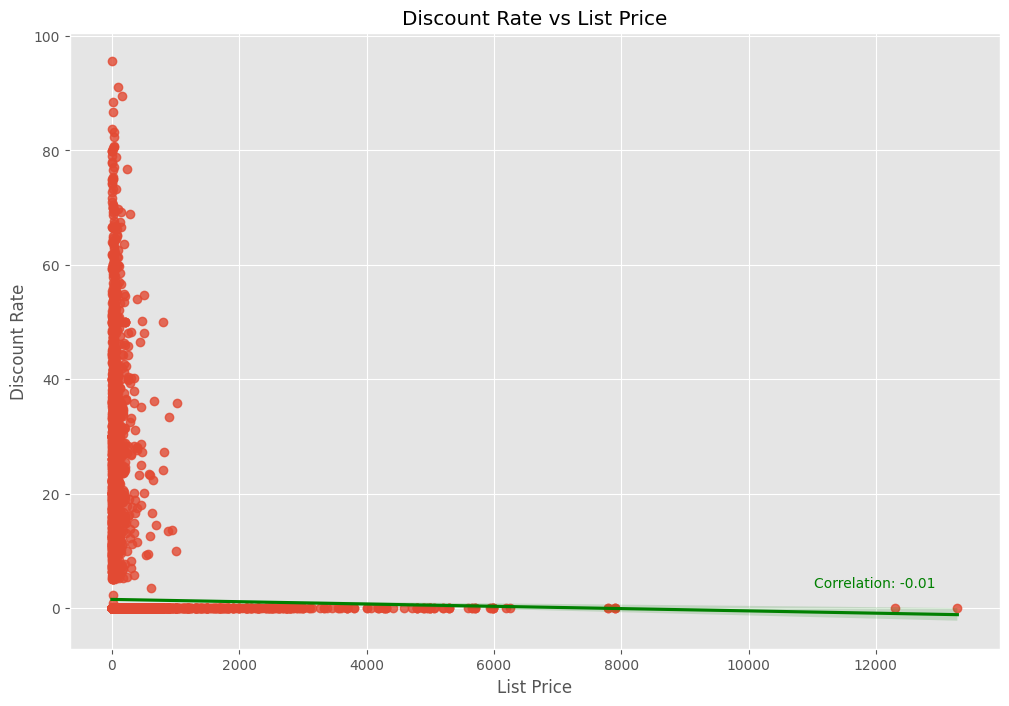

In [45]:
# Regression analysis

sns.regplot(x='List Price', y='Discount Rate', data=df3, line_kws={"color":"green"} )

corr = df3['List Price'].corr(df3['Discount Rate'])
plt.annotate(f'Correlation: {corr:.2f}', xy=(0.8, 0.1), xycoords='axes fraction', fontsize=10, color='green')

plt.xlabel('List Price')
plt.ylabel('Discount Rate')
plt.title('Discount Rate vs List Price')

plt.savefig('5')
# So sad ;(, I always believed that Amazon/Walmart gives more discounts to small items and groceries with cheap prices.  

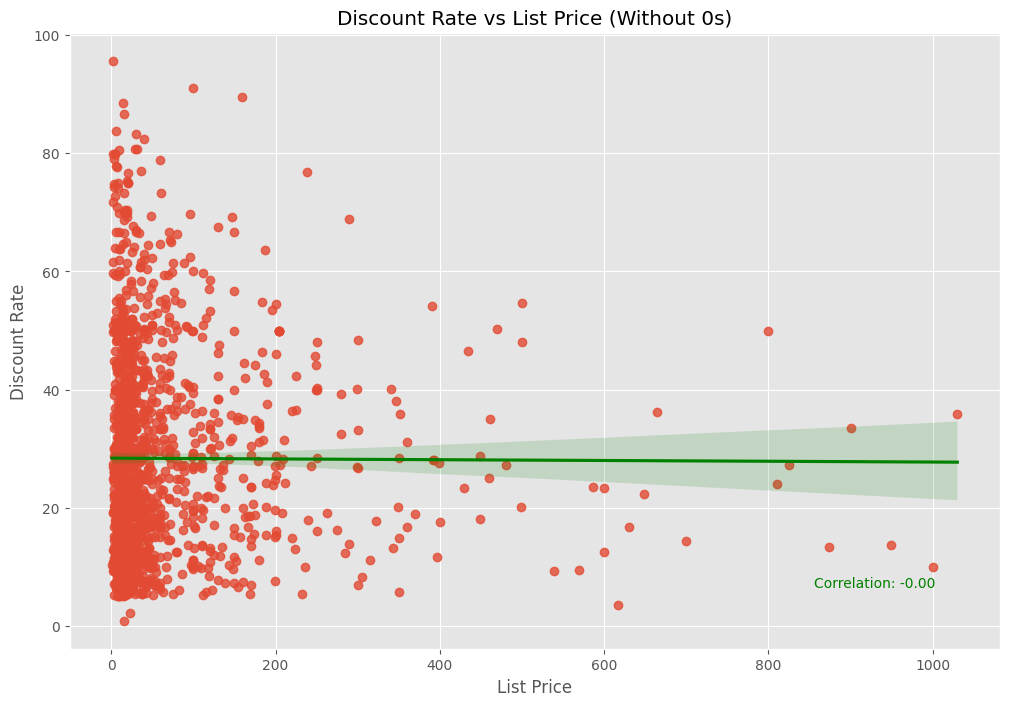

In [44]:
# The major of this data set concentrates at discount rate=0%, the correlation of the entire data set may be -> 0.
# Let's try the same approach again with a filtered data set.

df4 = df2[(df2['Discount Rate'] > 0) ]

sns.regplot(x='List Price', y='Discount Rate', data=df4, line_kws={"color":"green"} )

corr = df4['List Price'].corr(df4['Discount Rate'])
plt.annotate(f'Correlation: {corr:.2f}', xy=(0.8, 0.1), xycoords='axes fraction', fontsize=10, color='green')

plt.xlabel('List Price')
plt.ylabel('Discount Rate')
plt.title('Discount Rate vs List Price (Without 0s)')

plt.savefig('4')



In [28]:
# Instead of the correlation of discount rate, let's deep dive into the possibility of getting a discount over all prices

# Create a new colomun 'Discount?' with only True or False values.
df2['Discount?'] = df2['Discount Rate'] > 0.0
print(df2[['List Price', 'Discount Rate', 'Discount?']])

       List Price  Discount Rate  Discount?
0           31.93            0.0      False
1           10.48            0.0      False
2           10.99            0.0      False
3           38.59            0.0      False
4            5.81            0.0      False
...           ...            ...        ...
29599       45.99            0.0      False
29600       33.25            0.0      False
29601        8.88            0.0      False
29602       50.00           51.0       True
29603        6.00           30.0       True

[29604 rows x 3 columns]


In [29]:
# After a set of unsucessful approaches to find a correlation, however still noticing some trend in the plot. 
# I hypothesize that the fact that most data is concentrated in the low price area and major products does not offer a discount, make it a very skewed 
# data set to be analyzed in the formal way.
# I decided to seek solution by manually calculate the Discount probabilty for each domain of the data set.

below60 = df2[df2['List Price'] <= 60]

# Count the numbers of True values
discount_no60b = below60[below60['Discount?'] == True].shape[0]
total_no60b = below60.shape[0]

# Discount probability 
discount_probability60b = (discount_no60b / total_no60b) * 100

# Print the results
print(f'Discount Probability: {discount_probability60b:.2f}%')
print(f'Total number of Items with list price smaller than or equal to 60: {total_no60b}')


Discount Probability: 5.00%
Total number of Items with list price smaller than or equal to 60: 23963


In [30]:
# Do the same for 60~
above60 = df2[df2['List Price'] >= 60]

# Count the numbers of True values
discount_no60a = above60[above60['Discount?'] == True].shape[0]
total_no60a = above60.shape[0]

# Discount probability 
discount_probability60a = (discount_no60a / total_no60a) * 100

# Print the results
print(f'Discount Probability: {discount_probability60a:.2f}%')
print(f'Total number of Items with list price larger than 60: {total_no60a}')


Discount Probability: 6.26%
Total number of Items with list price larger than 60: 5653


In [31]:
# Since the Domain of list price 1-60 contains 24000+ items which is the major of the data set, let's dive into it again.

below30 = df2[df2['List Price'] <= 30]

# Count the numbers of True values
discount_no30b = below30[below30['Discount?'] == True].shape[0]
total_no30b = below30.shape[0]

# Discount probability 
discount_probability30b = (discount_no30b / total_no30b) * 100

# Print the results
print(f'Discount Probability: {discount_probability30b:.2f}%')
print(f'Total number of Items with list price smaller than or equal to 30: {total_no30b}')



# 30~
above30 = df2[(df2['List Price'] >= 30) & (df2['List Price'] <= 60)]

# Count the numbers of True values
discount_no30a = above30[above30['Discount?'] == True].shape[0]
total_no30a = above30.shape[0]

# Discount probability 
discount_probability30a = (discount_no30a / total_no30a) * 100

# Print the results
print(f'Discount Probability: {discount_probability30a:.2f}%')
print(f'Total number of Items with list price between 30 and 60: {total_no30a}')

Discount Probability: 4.99%
Total number of Items with list price smaller than or equal to 30: 18651
Discount Probability: 5.19%
Total number of Items with list price between 30 and 60: 5340


In [32]:
# One more time

below15 = df2[df2['List Price'] <= 15]

# Count the numbers of True values
discount_no15b = below15[below15['Discount?'] == True].shape[0]
total_no15b = below15.shape[0]

# Discount probability 
discount_probability15b = (discount_no15b / total_no15b) * 100

# Print the results
print(f'Discount Probability: {discount_probability15b:.2f}%')
print(f'Total number of Items with list price smaller than or equal to 15: {total_no15b}')



# 15~
above15 = df2[(df2['List Price'] >= 15) & (df2['List Price'] <= 30)]

# Count the numbers of True values
discount_no15a = above15[above15['Discount?'] == True].shape[0]
total_no15a = above15.shape[0]

# Discount probability 
discount_probability15a = (discount_no15a / total_no15a) * 100

# Print the results
print(f'Discount Probability: {discount_probability15a:.2f}%')
print(f'Total number of Items with list price between 15 and 30: {total_no30a}')

Discount Probability: 4.75%
Total number of Items with list price smaller than or equal to 15: 10929
Discount Probability: 5.37%
Total number of Items with list price between 15 and 30: 5340


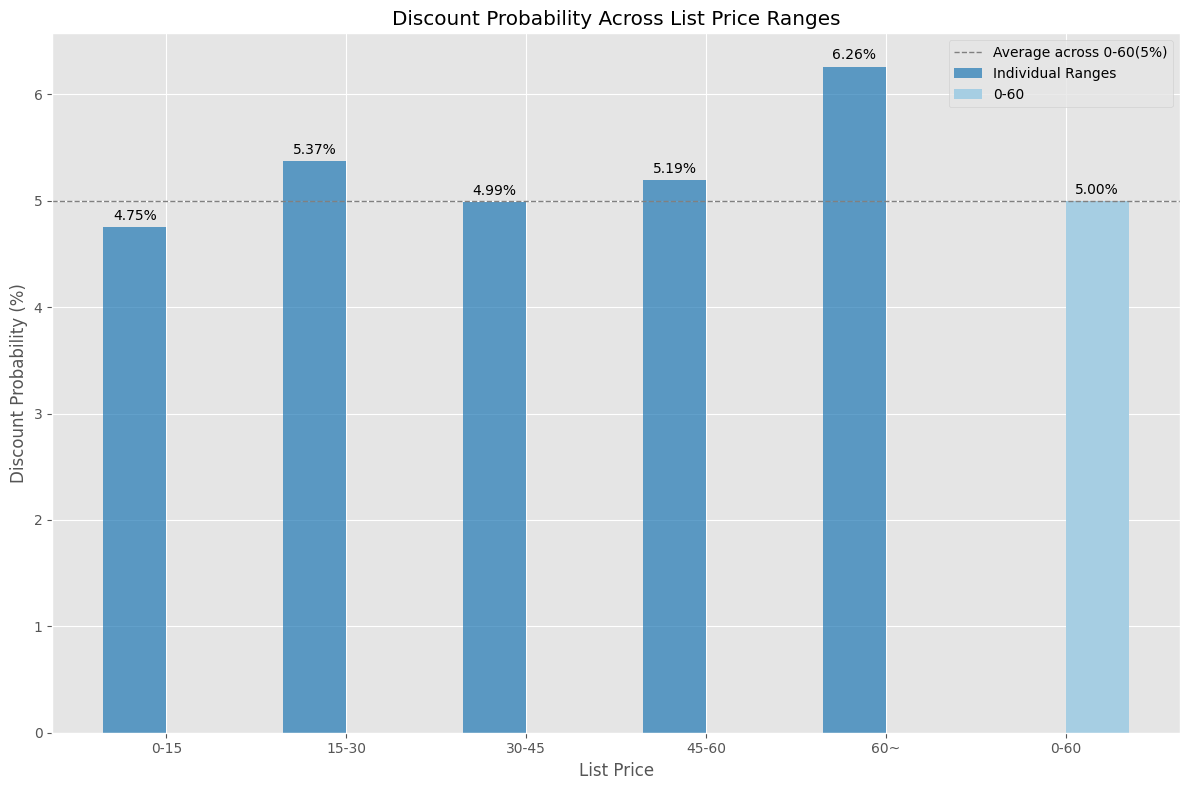

In [36]:
# Let's plot it out
price_ranges = ['0-15', '15-30', '30-45', '45-60', '60~', '0-60']
discount_probabilities = [4.75, 5.37, 4.99, 5.19, 6.26, 5.00]

base_color = '#1f78b4'  
combined_color = '#a6cee3'  

# Make a bar plot
fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(price_ranges))

# Plot the consecutive bars (grouped) 
bars_grouped = ax.bar(index[:-1] - bar_width/2, discount_probabilities[:-1], bar_width, label='Individual Ranges', color=base_color, alpha=0.7)

# Plot the 1-60 bar
bar_combined = ax.bar(index[-1] + bar_width/2, discount_probabilities[-1], bar_width, label='0-60', color=combined_color)
ax.axhline(y=5, linestyle='--', color='gray', linewidth=1, label='Average across 0-60(5%)')

# Add Information
ax.set_xlabel('List Price')
ax.set_ylabel('Discount Probability (%)')
ax.set_title('Discount Probability Across List Price Ranges')
ax.set_xticks(index)
ax.set_xticklabels(price_ranges)
ax.legend()


for bar in bars_grouped:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')


height_combined = bar_combined[0].get_height()
ax.annotate(f'{height_combined:.2f}%', xy=(bar_combined[0].get_x() + bar_combined[0].get_width() / 2, height_combined),
            xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')


fig.tight_layout()
plt.savefig('discount_prob')
plt.show()

Available
True     27928
False     1676
Name: count, dtype: int64


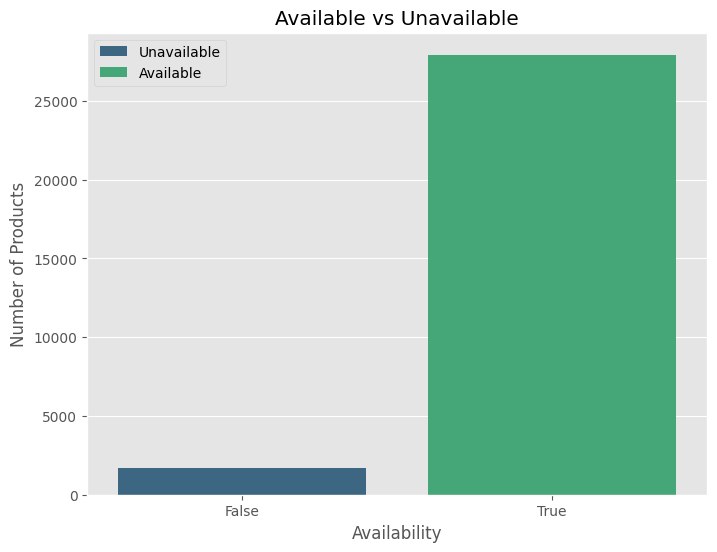

In [34]:
# Availability
avaibNo = df2['Available'].value_counts()
print(avaibNo)

# Define Colors
colors = ['Unavailable' if val == False else 'Available' for val in avaibNo.index]

# Plot Available vs Unavailable
plt.figure(figsize=(8, 6))
sns.barplot(x=avaibNo.index, y=avaibNo.values, palette='viridis', hue=colors)
plt.title('Available vs Unavailable')
plt.xlabel('Availability')
plt.ylabel('Number of Products')
plt.show()

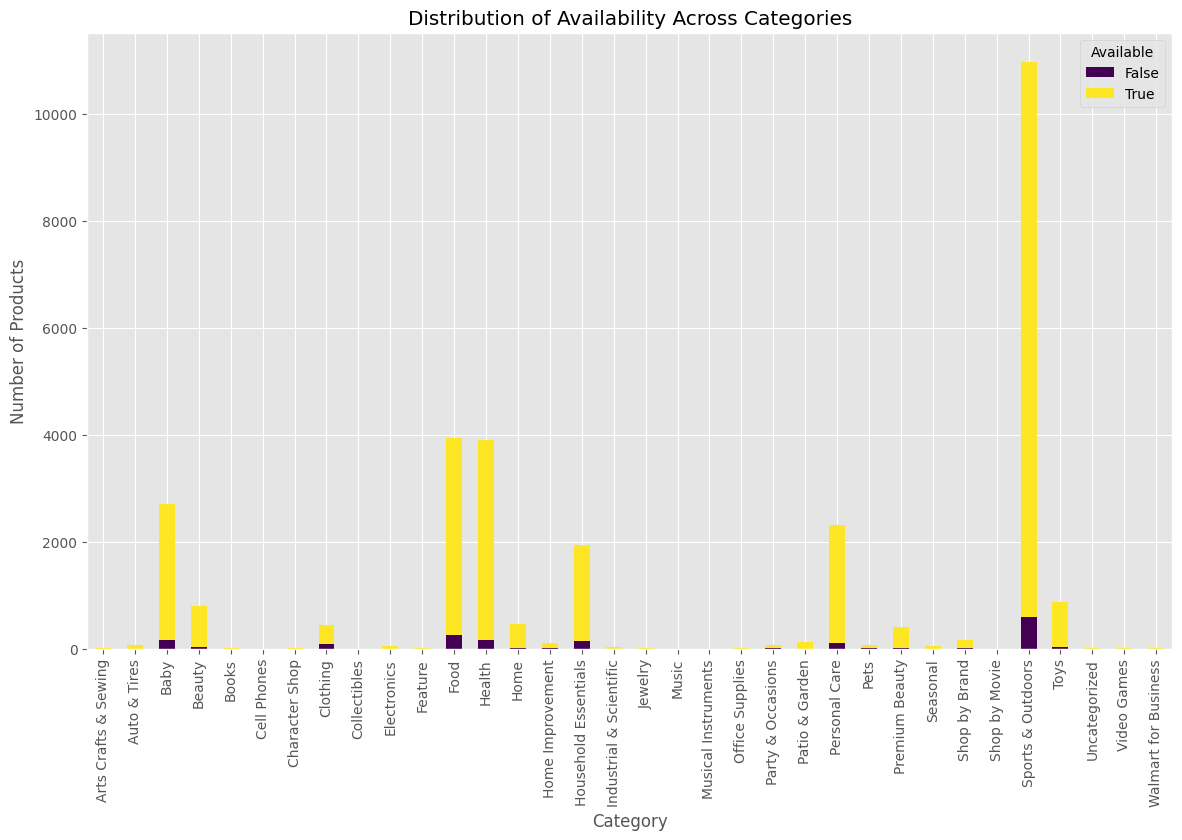

In [47]:
# Availability across Categories
grouped_df = df2.groupby(['Big_Category', 'Available']).size().unstack()

# Plot bar chart
grouped_df.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Distribution of Availability Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.legend(title='Available', loc='upper right')

plt.savefig('6')
plt.show()


In [36]:
# Let's list the percentage of availability out among all categories

#
avb_df = df2.groupby('Big_Category')['Available'].agg(['sum', 'count'])
avb_df['Availability Percentage'] = (avb_df['sum'] / avb_df['count']) * 100
avb_df.reset_index(inplace=True)
avb_df.columns = ['Category', 'Number of available', 'Number of all items', 'Availability Percentage']

# Sort dataframe in descending order
avb_df = avb_df.sort_values(by='Availability Percentage', ascending=False)

avb_df.head(34)


,Category,Number of available,Number of all items,Availability Percentage
0,Arts Crafts & Sewing,8,8,100.000000
8,Collectibles,3,3,100.000000
20,Office Supplies,5,5,100.000000
19,Musical Instruments,2,2,100.000000
16,Industrial & Scientific,30,30,100.000000
10,Feature,15,15,100.000000
33,Walmart for Business,7,7,100.000000
5,Cell Phones,4,4,100.000000
6,Character Shop,5,5,100.000000
22,Patio & Garden,119,120,99.166667
